# Classification Predict TeamJS1 Solutions

© Explore Data Science Academy

---
### Honour Code

We {**TeamJS1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview:Climate change

Many companies are built around lessening one’s environmental impact or carbon footprint and they would like to determine how people perceive climate change and whether or not they believe it is a real threat.Our company has been awarded a contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to us, the senior data scientists, by our manager via email reads as follow:

> In this project you are tasked to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.The climate change, which will be referred to as the target variable, will be modelled as a function of various tweets.Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model climate change


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Introduction

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

%matplotlib inline
# set plot style
sns.set()

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [21]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [25]:
train_df.shape

(15819, 3)

In [24]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [26]:
train_df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [27]:
train_df.skew()

C:\Users\F5471362\AppData\Local\Temp\ipykernel_17108\2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


sentiment   -0.683959
tweetid     -0.008471
dtype: float64

The column sentiment is moderately skewed to the negative direction while the column tweetid is fairly symmetrical

In [28]:
train_df.kurtosis()

C:\Users\F5471362\AppData\Local\Temp\ipykernel_17108\861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


sentiment    0.122976
tweetid     -1.193356
dtype: float64

From the above figures we can infer there are no outliers in our dataset

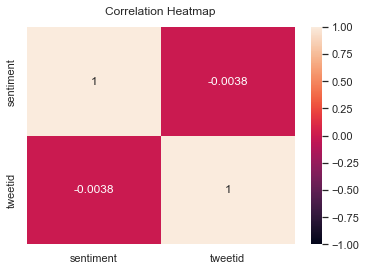

In [29]:
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From our heatmap above there is no indication of high correlation amongst our variables

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [31]:
y = train_df['sentiment']
X = train_df.drop('sentiment', axis=1)

In [32]:
X

,message,tweetid
0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,It's not like we lack evidence of anthropogeni...,126103
2,RT @RawStory: Researchers say we have three ye...,698562
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...
15814,RT @ezlusztig: They took down the material on ...,22001
15815,RT @washingtonpost: How climate change could b...,17856
15816,notiven: RT: nytimesworld :What does Trump act...,384248
15817,RT @sara8smiles: Hey liberals the climate chan...,819732


In [33]:
y

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


## Conclusion